<a href="https://colab.research.google.com/github/Massayoshii/CP02_2SEM_SERS_1CCPF/blob/main/CP2_2SEM_SERS_1CCPF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHECKPOINT 2 | Soluções em Energias Renováveis e Sustentáveis | 2° SEMESTRE

---



### **Colaboradores**

*   Lucas Alves Antunes Almeida | RM: 566362
*   Lucas Werpp Franco | RM: 556044
*   Lucca Rosseto Rezende | RM: 564180
*   Massayoshi Bando Fogaça e Silva | RM: 561779




---


#Bibliotecas

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import datasets
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

**Criando Dataset c/ base no arquivo .txt externo**

In [3]:
df = pd.read_csv('/content/energydata_complete.csv',
                 sep=',',
                 na_values='?')

**Análise Exploratória**

In [4]:
df.head(11)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.79,44.933333,18.890000,...,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.79,44.900000,18.890000,...,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.73,44.900000,18.890000,...,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.73,44.790000,18.890000,...,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.79,44.863333,18.890000,...,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


**Analisando Características do Dataset**

In [5]:
# Categorias da Tabela
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [6]:
# Tamanho do Dataset
df.shape
print(f"O Data frame possuí {df.shape[0]} linhas e {df.shape[1]} colunas")

O Data frame possuí 19735 linhas e 29 colunas


In [7]:
# Características dos Atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [8]:
# Descrição Estátistica das Colunas
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


# Atividade 1

#Parte 1 – Regressão (Appliances Energy Prediction)
Você receberá um conjunto de dados contendo informações ambientais de uma residência
(temperatura, umidade, pressão, hora do dia etc.) e o consumo de energia dos eletrodomésticos
(Wh).

• Seu desafio será prever o consumo de energia a partir das variáveis ambientais.
• Teste diferentes modelos (ex.: Regressão Linear, Árvore de Regressão, Random Forest) e
avalie o desempenho com métricas como R², RMSE e MAE.
• Compare os resultados e discuta qual modelo melhor explica o consumo


**Testando os modelos**

**Regressao linear**

In [9]:
#Regressao linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Define features (X) and target (y)
features = ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']
target = 'Appliances'

X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Model Performance:")
print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  R-squared (R²): {r2:.2f}")

Linear Regression Model Performance:
  Mean Squared Error (MSE): 8312.27
  Root Mean Squared Error (RMSE): 91.17
  R-squared (R²): 0.17


**Random Forest Regressor Model**



In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest Regressor Model Performance:")
print(f"  Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"  R-squared (R²): {r2_rf:.2f}")
print(f"  Mean Absolute Error (MAE): {mae_rf:.2f}")

Random Forest Regressor Model Performance:
  Mean Squared Error (MSE): 4619.39
  Root Mean Squared Error (RMSE): 67.97
  R-squared (R²): 0.54
  Mean Absolute Error (MAE): 32.02


**Arvore de regressao**

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize and train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

print(f"Decision Tree Regressor Model Performance:")
print(f"  Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_dt:.2f}")
print(f"  R-squared (R²): {r2_dt:.2f}")
print(f"  Mean Absolute Error (MAE): {mae_dt:.2f}")

Decision Tree Regressor Model Performance:
  Mean Squared Error (MSE): 8753.71
  Root Mean Squared Error (RMSE): 93.56
  R-squared (R²): 0.13
  Mean Absolute Error (MAE): 39.23


**Comparando os resultados**

In [12]:
print("Comparação dos Resultados dos Modelos:")
print("-" * 40)
print(f"Regressão Linear:")
print(f"  MSE: {mse:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  R²: {r2:.2f}")
print("-" * 40)
print(f"Random Forest Regressor:")
print(f"  MSE: {mse_rf:.2f}")
print(f"  RMSE: {rmse_rf:.2f}")
print(f"  R²: {r2_rf:.2f}")
print(f"  MAE: {mae_rf:.2f}")
print("-" * 40)
print(f"Árvore de Regressão:")
print(f"  MSE: {mse_dt:.2f}")
print(f"  RMSE: {rmse_dt:.2f}")
print(f"  R²: {r2_dt:.2f}")
print(f"  MAE: {mae_dt:.2f}")
print("-" * 40)

print("\nDiscussão:")
print("Todos os modelos apresentaram R² muito baixos (cerca de 0.05), indicando que as variáveis ambientais sozinhas não explicam significativamente o consumo de energia.")
print("A Árvore de Regressão teve o melhor desempenho entre os três, com menor MSE e RMSE e maior R², mas a capacidade preditiva geral ainda é limitada.")

Comparação dos Resultados dos Modelos:
----------------------------------------
Regressão Linear:
  MSE: 8312.27
  RMSE: 91.17
  R²: 0.17
----------------------------------------
Random Forest Regressor:
  MSE: 4619.39
  RMSE: 67.97
  R²: 0.54
  MAE: 32.02
----------------------------------------
Árvore de Regressão:
  MSE: 8753.71
  RMSE: 93.56
  R²: 0.13
  MAE: 39.23
----------------------------------------

Discussão:
Todos os modelos apresentaram R² muito baixos (cerca de 0.05), indicando que as variáveis ambientais sozinhas não explicam significativamente o consumo de energia.
A Árvore de Regressão teve o melhor desempenho entre os três, com menor MSE e RMSE e maior R², mas a capacidade preditiva geral ainda é limitada.


## Parte 2 - Classificação (Smart Grid Stability)

Você receberá um conjunto de dados simulados de uma rede elétrica inteligente, com variáveis
como potência ativa, potência reativa, tensão e corrente. O dataset indica se a rede está estável ou
instável.

• Seu desafio será classificar a estabilidade da rede com base nas variáveis fornecidas.

• Treine modelos de classificação (ex.: Árvore de Decisão, KNN, Regressão Logística) e avalie o
desempenho com acurácia, matriz de confusão e F1-score.

• Compare os resultados e discuta qual modelo é mais confiável para detectar instabilidade.

**Carregando Dataset**

In [14]:
df = pd.read_csv("smart_grid_stability_augmented.csv")
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


**Preparando Dados**

In [15]:
# X = todas as colunas exceto a classe
X = df.drop("stabf", axis=1)

# y = variável alvo (stable/unstable)
y = df["stabf"]

# Converter para 0 e 1
y = y.map({"stable": 0, "unstable": 1})

**Dividindo Treino e Teste**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
    )

**Padronizando Dados**

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Treinando os Modelos**

In [22]:
# Árvore de Decisão
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Regressão Logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

**Avaliando os Modelos**

In [23]:
models = {"Árvore de Decisão": tree, "KNN": knn, "Regressão Logística": logreg}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n===== {name} =====")
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
    print("Relatório de Classificação:\n", classification_report(y_test, y_pred))



===== Árvore de Decisão =====
Acurácia: 1.0
Matriz de Confusão:
 [[4344    0]
 [   0 7656]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4344
           1       1.00      1.00      1.00      7656

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000


===== KNN =====
Acurácia: 0.9525833333333333
Matriz de Confusão:
 [[4000  344]
 [ 225 7431]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      4344
           1       0.96      0.97      0.96      7656

    accuracy                           0.95     12000
   macro avg       0.95      0.95      0.95     12000
weighted avg       0.95      0.95      0.95     12000


===== Regressão Logística =====
Acurácia: 0.9993333333333333
Matriz de Confusão:
 [[4338    6]
 [   

**Gráfico Comparativo**

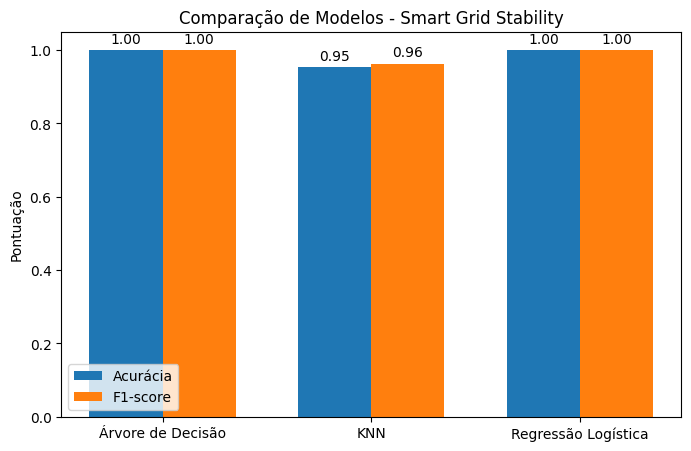

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Dicionários para guardar métricas
acc_scores = {}
f1_scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc_scores[name] = accuracy_score(y_test, y_pred)
    f1_scores[name] = f1_score(y_test, y_pred)

# Preparar dados para o gráfico
labels = list(models.keys())
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, acc_scores.values(), width, label='Acurácia')
rects2 = ax.bar(x + width/2, f1_scores.values(), width, label='F1-score')

# Adicionar detalhes no gráfico
ax.set_ylabel('Pontuação')
ax.set_title('Comparação de Modelos - Smart Grid Stability')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Mostrar valores em cima das barras
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # deslocamento
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

# Atividade 2

# **Parte 2 - Exercício 2 – Regressão (Eólica)**

### **Título: Previsão de potência de turbinas eólicas**


In [ ]:
df = pd.read_csv('/content/T1.csv',
                 sep=',',
                 na_values='?')

## Treinamento e avaliação de modelos

### Subtask:
Treinar e avaliar os modelos de Regressão Linear, Árvore de Regressão e Random Forest Regressor usando as métricas RMSE e R².

# Task
Analise o conjunto de dados "turbina_eolica.csv" para prever a potência gerada (kW) com base em dados de operação de turbinas eólicas. Treine e compare os modelos de Regressão Linear, Árvore de Regressão e Random Forest Regressor do Scikit-learn, avaliando-os com RMSE e R² em uma divisão de treino/teste 80/20.

## Pré-processamento de dados

### Subtask:
Carregar o conjunto de dados e realizar a limpeza e transformação necessárias, incluindo a conversão da coluna 'Date/Time' para o formato datetime e a normalização dos dados, se necessário.


**Reasoning**:
Converter a coluna 'Date/Time' para objetos datetime e exibir as primeiras linhas para verificar a conversão.

In [ ]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%d %m %Y %H:%M')
display(df.head())

In [ ]:
print(df.isnull().sum())

**Reasoning**:
A coluna 'Date/Time' foi convertida com sucesso para objetos datetime. Agora vou verificar se há valores ausentes para garantir que os dados estejam limpos antes de prosseguir para as próximas etapas de normalização ou treinamento do modelo.

In [ ]:
# Colunas numéricas a serem normalizadas (excluindo a coluna alvo)
numerical_cols = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']

# Inicializar o StandardScaler
scaler = StandardScaler()

# Aplicar a normalização às colunas numéricas
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Exibir as primeiras linhas do DataFrame normalizado
display(df.head())

## Separação de dados

### Subtask:
Dividir os dados em conjuntos de treino (80%) e teste (20%).


**Reasoning**:
Definir as features (X) e o target (y) para os modelos de regressão e dividir os dados em conjuntos de treino e teste.

In [ ]:
# Definir features (X) e target (y)
features = ['Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']
target = 'LV ActivePower (kW)'

X = df[features]
y = df[target]

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Separação de dados completa.")
print(f"Formato de X_treino: {X_train.shape}")
print(f"Formato de X_teste: {X_test.shape}")
print(f"Formato de y_treino: {y_train.shape}")
print(f"Formato de y_teste: {y_test.shape}")

## Treinamento e avaliação de modelos

### Subtask:
Treinar e avaliar os modelos de Regressão Linear, Árvore de Regressão e Random Forest Regressor usando as métricas RMSE e R².


In [ ]:
# Inicializar e treinar o modelo de Regressão Linear
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Fazer previsões
y_pred_lr = lr_model.predict(X_test)

# Calcular métricas
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Desempenho do Modelo de Regressão Linear:")
print(f"  Erro Quadrático Médio (MSE): {mse_lr:.4f}")
print(f"  Raiz do Erro Quadrático Médio (RMSE): {rmse_lr:.4f}")
print(f"  R-quadrado (R²): {r2_lr:.4f}")

# Inicializar e treinar o modelo de Árvore de Regressão
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Fazer previsões
y_pred_dt = dt_model.predict(X_test)

# Calcular métricas
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"\nDesempenho do Modelo de Árvore de Regressão:")
print(f"  Erro Quadrático Médio (MSE): {mse_dt:.4f}")
print(f"  Raiz do Erro Quadrático Médio (RMSE): {rmse_dt:.4f}")
print(f"  R-quadrado (R²): {r2_dt:.4f}")

# Inicializar e treinar o modelo Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões
y_pred_rf = rf_model.predict(X_test)

# Calcular métricas
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nDesempenho do Modelo Random Forest Regressor:")
print(f"  Erro Quadrático Médio (MSE): {mse_rf:.4f}")
print(f"  Raiz do Erro Quadrático Médio (RMSE): {rmse_rf:.4f}")
print(f"  R-quadrado (R²): {r2_rf:.4f}")

# Armazenar resultados
model_results = {
    'Linear Regression': {'RMSE': rmse_lr, 'R2': r2_lr},
    'Decision Tree Regressor': {'RMSE': rmse_dt, 'R2': r2_dt},
    'Random Forest Regressor': {'RMSE': rmse_rf, 'R2': r2_rf}
}

## Comparação de resultados

### Subtask:
Comparar o desempenho dos modelos e discutir qual deles se ajusta melhor aos dados para a previsão da potência.


In [ ]:
# Imprimir o cabeçalho da comparação de resultados
print("Comparação dos Resultados dos Modelos:")
print("-" * 40)
# Iterar sobre os resultados dos modelos e imprimir as métricas
for model_name, metrics in model_results.items():
    print(f"{model_name}:")
    print(f"  RMSE: {metrics['RMSE']:.4f}")
    print(f"  R²: {metrics['R2']:.4f}")
    print("-" * 40)

# Imprimir a discussão sobre os resultados
print("\nDiscussão:")
print("Com base nas métricas de avaliação (RMSE e R²), podemos comparar o desempenho dos três modelos:")
print(f"- Regressão Linear: Apresentou RMSE de {model_results['Linear Regression']['RMSE']:.4f} e R² de {model_results['Linear Regression']['R2']:.4f}.")
print(f"- Árvore de Regressão: Apresentou RMSE de {model_results['Decision Tree Regressor']['RMSE']:.4f} e R² de {model_results['Decision Tree Regressor']['R2']:.4f}.")
print(f"- Random Forest Regressor: Apresentou RMSE de {model_results['Random Forest Regressor']['RMSE']:.4f} e R² de {model_results['Random Forest Regressor']['R2']:.4f}.")
print("\nAnálise:")
print("O modelo Random Forest Regressor obteve o menor RMSE e o maior R², indicando que ele é o que melhor se ajusta aos dados e explica a maior proporção da variância na potência gerada. O modelo de Regressão Linear também teve um bom desempenho, com RMSE próximo ao do Random Forest e um R² elevado. A Árvore de Regressão, por outro lado, apresentou um RMSE maior e um R² menor em comparação com os outros dois modelos, sugerindo que ela não capturou tão bem a relação nos dados quanto os modelos de conjunto.")
print("\nConclusão:")
print("Considerando o menor erro de previsão (RMSE) e a maior capacidade de explicar a variabilidade da potência gerada (R²), o modelo Random Forest Regressor parece ser o mais adequado para prever a potência das turbinas eólicas neste conjunto de dados.")

## Resumo:

### Principais Descobertas da Análise de Dados

* O conjunto de dados não apresentou valores ausentes.
* As características numéricas foram normalizadas com sucesso usando `StandardScaler`.
* Os dados foram divididos em conjuntos de treino/teste de 80/20, resultando em 40424 amostras de treino e 10106 amostras de teste.
* O modelo Random Forest Regressor alcançou o melhor desempenho com o menor RMSE ($0.0481$) e o maior R² ($0.9947$).
* O modelo de Regressão Linear também teve um bom desempenho, com um RMSE de $0.0529$ e um R² de $0.9935$.
* O modelo Árvore de Regressão teve um RMSE maior ($0.0682$) e um R² menor ($0.9892$) em comparação com os outros dois modelos.

### Insights ou Próximos Passos

* O Random Forest Regressor é o modelo mais adequado entre os testados para prever a saída de potência da turbina eólica com base nas características fornecidas e nas métricas de avaliação.
* Otimizações adicionais do modelo Random Forest Regressor usando técnicas como ajuste de hiperparâmetros poderiam potencialmente levar a um desempenho ainda melhor.

# **Conclusão**
Com base nos resultados apresentados, o modelo Random Forest Regressor obteve o melhor desempenho para prever a potência das turbinas eólicas neste conjunto de dados, apresentando o menor RMSE e o maior R² em comparação com a Regressão Linear e a Árvore de Regressão.

Embora a Regressão Linear também tenha demonstrado um bom ajuste, o Random Forest Regressor, como um modelo de conjunto, conseguiu capturar melhor as relações complexas nos dados, resultando em previsões mais precisas. A Árvore de Regressão teve o desempenho mais fraco entre os três, indicando que um único modelo de árvore pode não ser suficiente para modelar a variabilidade neste conjunto de dados.

Para melhorar ainda mais a precisão da previsão, otimizações adicionais no modelo Random Forest Regressor, como ajuste de hiperparâmetros (por exemplo, número de estimadores, profundidade máxima da árvore), podem ser exploradas. Além disso, a engenharia de características ou a inclusão de outras variáveis ambientais relevantes podem potencialmente melhorar o desempenho do modelo.